In [2]:
import torch

In [3]:
x_mark_initial = torch.load('/home/yl2428/Time-LLM/x_mark_initial.pth')

In [4]:
wearable = torch.load('/home/yl2428/Time-LLM/wearable.pth')

In [ ]:
we

In [5]:
wearable_features = torch.load('/home/yl2428/Time-LLM/wearable_feature.pth')

In [6]:
temporal_out = torch.load('/home/yl2428/Time-LLM/temporal_out.pth')

In [7]:
covariates = torch.load('/home/yl2428/Time-LLM/covariates.pth')

In [8]:
covariates.shape

torch.Size([1024, 5])

In [9]:
wearable_features.shape

torch.Size([1024, 32])

In [10]:
wearable_features

tensor([[ 0.6852, -0.4111,  0.5061,  ..., -0.3604, -0.5310,  0.0653],
        [ 0.3665, -0.8965, -0.7901,  ...,  0.1771, -0.1576, -2.0131],
        [ 0.3174,  0.3329,  1.2008,  ..., -0.5245,  1.2728,  0.7644],
        ...,
        [ 0.4975, -0.0127,  1.3690,  ..., -0.3863,  1.0883,  0.7699],
        [ 0.3829, -1.9220, -0.3429,  ...,  0.6103, -0.0438, -1.3170],
        [-0.8589,  0.4137,  0.5312,  ..., -0.5088,  0.2896,  1.2604]],
       device='cuda:0')

/home/yl2428/.conda/envs/Time-LLM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


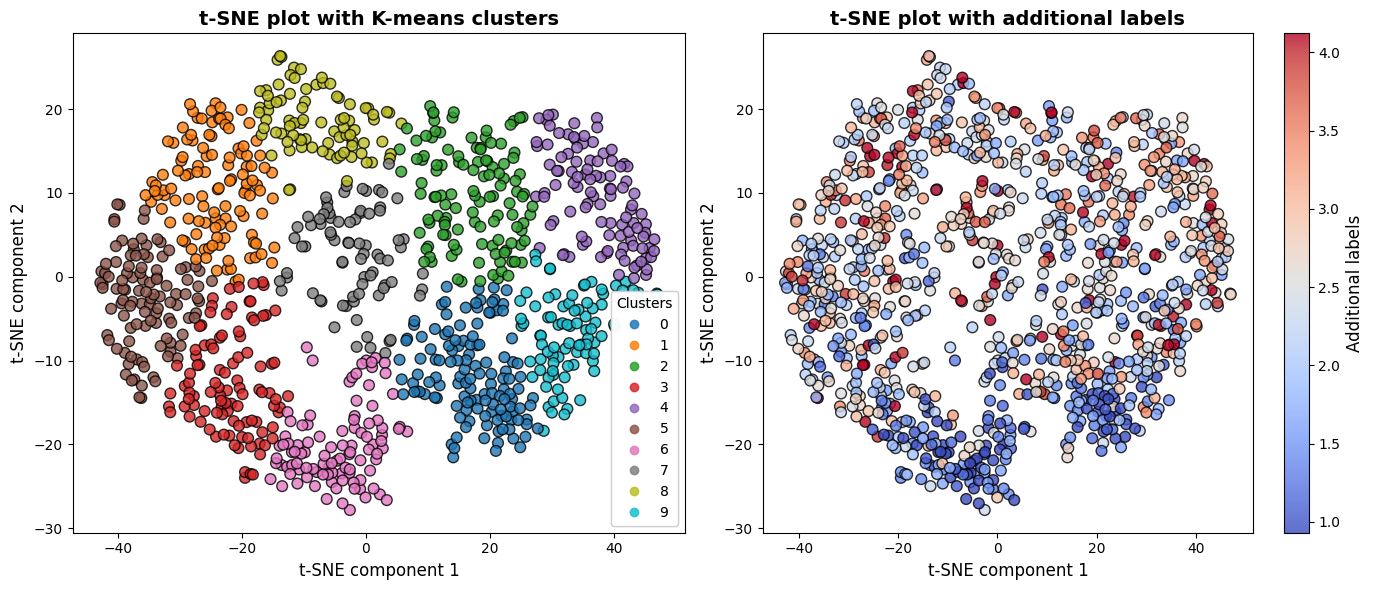

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib
import numpy as np
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(wearable_features.cpu().detach().numpy())

# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=0)  # Assuming we know there are 10 clusters
cluster_labels = kmeans.fit_predict(data_tsne)

# Use seaborn's pastel palette
# Define a color palette
palette = sns.color_palette("tab10", n_colors=11)

# Plot the t-SNE results with K-means cluster labels
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# t-SNE with K-means clusters
scatter1 = axes[0].scatter(data_tsne[:, 0], data_tsne[:, 1], c=cluster_labels, cmap='tab10', alpha=0.8, edgecolor='k', s=60)
legend1 = axes[0].legend(*scatter1.legend_elements(), title="Clusters", loc="best")
axes[0].add_artist(legend1)
axes[0].set_title('t-SNE plot with K-means clusters', fontsize=14, weight='bold')
axes[0].set_xlabel('t-SNE component 1', fontsize=12)
axes[0].set_ylabel('t-SNE component 2', fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=10)

# t-SNE with additional labels
# additional_labels = temporal_out[:, 2].cpu().detach().numpy()
# scatter2 = axes[1].scatter(data_tsne[:, 0], data_tsne[:, 1], c=additional_labels, cmap='coolwarm', alpha=0.8, edgecolor='k', s=60)
# cbar = plt.colorbar(scatter2, ax=axes[1])
# cbar.set_label('Additional labels', fontsize=12)
# axes[1].set_title('t-SNE plot with additional labels', fontsize=14, weight='bold')
# axes[1].set_xlabel('t-SNE component 1', fontsize=12)
# axes[1].set_ylabel('t-SNE component 2', fontsize=12)
# axes[1].tick_params(axis='both', which='major', labelsize=10)

additional_labels_2 = wearable[:, :, 0].max(1)[0].cpu().detach().numpy()
# additional_labels_2 = temporal_out[:, 0].cpu().detach().numpy()
# Determine the new color range limits
vmin = np.percentile(additional_labels_2, 5)  # 5th percentile
vmax = np.percentile(additional_labels_2, 95)  # 95th percentile

scatter2 = axes[1].scatter(data_tsne[:, 0], data_tsne[:, 1], c=additional_labels_2, cmap='coolwarm', alpha=0.8, edgecolor='k', s=60, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(scatter2, ax=axes[1])
cbar.set_label('Additional labels', fontsize=12)
axes[1].set_title('t-SNE plot with additional labels', fontsize=14, weight='bold')
axes[1].set_xlabel('t-SNE component 1', fontsize=12)
axes[1].set_ylabel('t-SNE component 2', fontsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
# Save the figure as a PDF
plt.savefig("tsne_plot-new-new.pdf", format="pdf")

plt.show()




In [14]:
import numpy as np
cluster_5_indices = np.where(cluster_labels == 5)[0]
print("Indices of data points in cluster 5:", cluster_5_indices)

Indices of data points in cluster 5: [  19   35   54   57   58   59   69   86   93   94  107  124  128  143
  145  149  154  156  159  204  215  225  228  231  238  249  268  270
  282  299  300  311  322  329  335  340  342  370  392  394  418  419
  439  464  471  478  481  492  500  503  511  516  535  551  570  571
  589  592  604  613  636  645  646  652  657  661  664  675  695  706
  709  710  711  730  732  741  742  748  770  772  776  782  784  789
  793  814  826  827  829  832  837  842  843  844  870  894  911  915
  917  936  944  954  964  966  979  982  999 1015]


In [27]:
cluster_rest_indices = np.where((cluster_labels != 5) & (cluster_labels != 0))[0]
temporal_out_cluster_rest = temporal_out[cluster_rest_indices, 0]
x_wearable_cluster_rest = wearable[cluster_rest_indices, :, :]

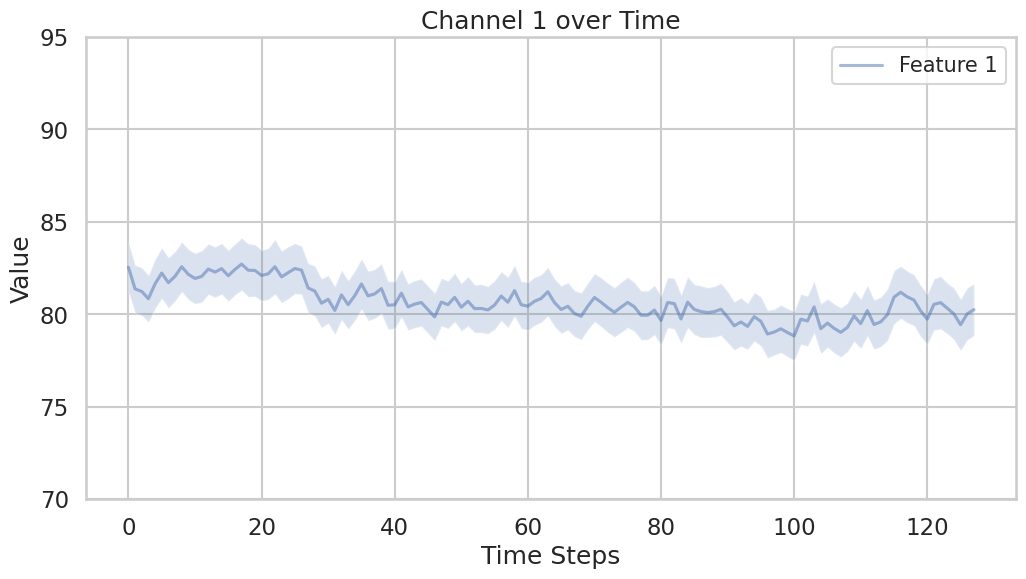

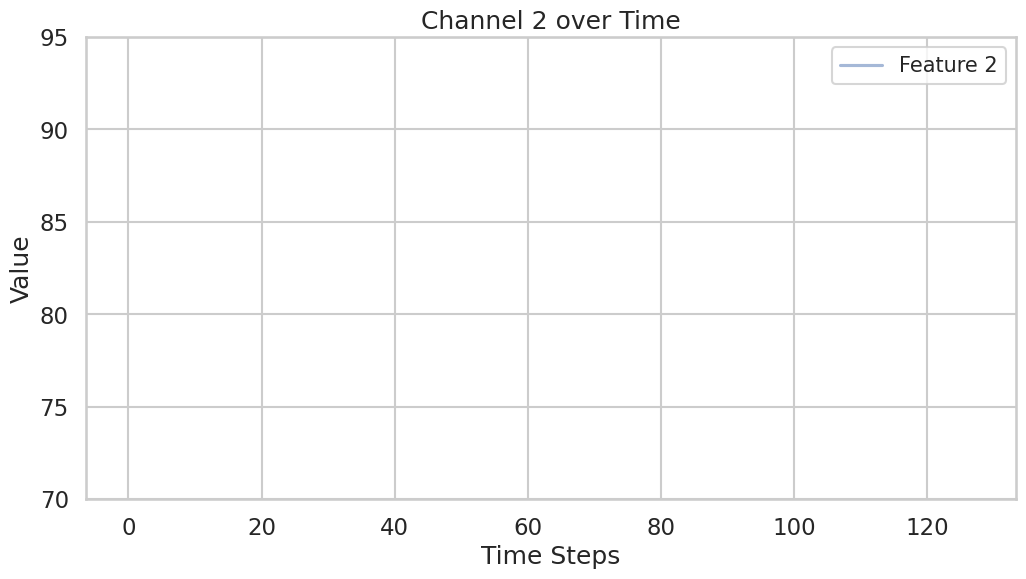

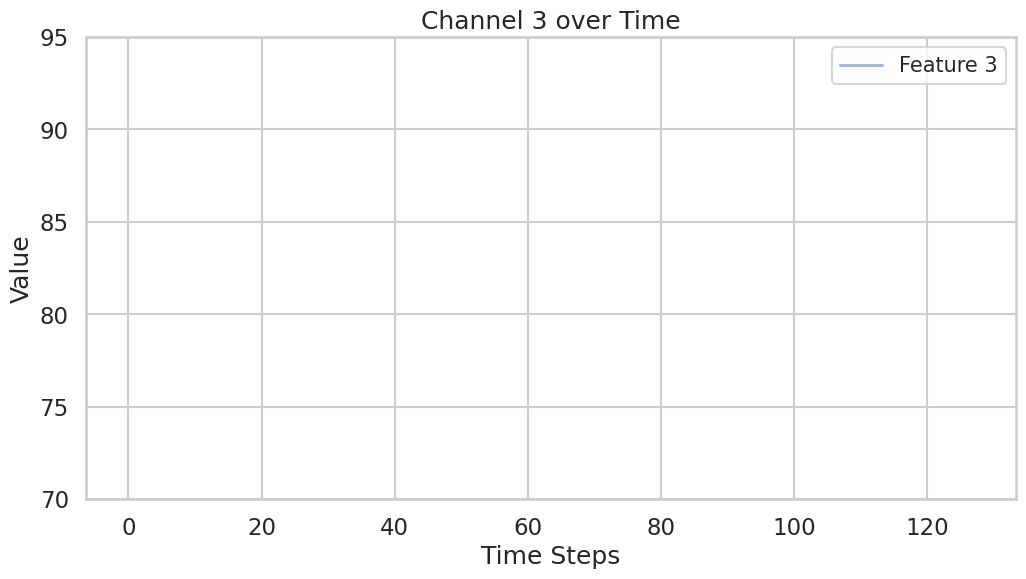

In [30]:
time_series = x_wearable_cluster_rest.cpu().detach().numpy()
time_steps = time_series.shape[1]
channels = time_series.shape[2]
# Function to calculate the mean and confidence intervals

# Function to calculate the mean and confidence intervals
def calculate_mean_and_confidence_interval(data, confidence=0.95):
    mean = np.mean(data, axis=0)
    n = data.shape[0]
    stderr = np.std(data, axis=0) / np.sqrt(n)
    margin = stderr * 1.96  # 95% confidence interval for large n
    lower_bound = mean - margin
    upper_bound = mean + margin
    return mean, lower_bound, upper_bound

for channel in range(channels):
    plt.figure(figsize=(12, 6))
    feature_data = time_series[:, :, channel]
    if channel == 0:
        feature_data = feature_data * 20.41707644 + 7.93461185e+01
    mean, lower_bound, upper_bound = calculate_mean_and_confidence_interval(feature_data)
    
    # Ensure all arrays are of the same shape
    mean = mean.flatten()
    lower_bound = lower_bound.flatten()
    upper_bound = upper_bound.flatten()
    feature = channel
    plt.plot(range(time_steps), mean, alpha=0.5, label=f'Feature {feature + 1}' if feature < 10 else "")
    # set y limits
    plt.ylim(70, 95)
    plt.fill_between(range(time_steps), lower_bound, upper_bound, alpha=0.2)
    plt.title(f'Channel {channel + 1} over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend(loc='upper right', ncol=2, fontsize='small')
    plt.grid(True)
    plt.savefig(f'channel_{channel + 1}_over_time.pdf', format='pdf')
    plt.show()

In [22]:
x_wearable_cluster_5 = wearable[cluster_5_indices]
temporal_out_cluster_5 = temporal_out[cluster_5_indices, 2]

In [62]:
x_wearable_cluster_5.shape

torch.Size([108, 128, 3])

In [66]:
time_series.shape

(108, 128, 3)

In [ ]:
time_series = x_wearable_cluster_5.cpu().detach().numpy()
time_steps = time_series.shape[1]
channels = time_series.shape[2]
# Function to calculate the mean and confidence intervals

# Function to calculate the mean and confidence intervals
def calculate_mean_and_confidence_interval(data, confidence=0.95):
    mean = np.mean(data, axis=0)
    n = data.shape[0]
    stderr = np.std(data, axis=0) / np.sqrt(n)
    margin = stderr * 1.96  # 95% confidence interval for large n
    lower_bound = mean - margin
    upper_bound = mean + margin
    return mean, lower_bound, upper_bound

for channel in range(channels):
    plt.figure(figsize=(12, 6))
    feature_data = time_series[:, :, channel]
    if channel == 0:
        feature_data = feature_data * 20.41707644 + 7.93461185e+01
    mean, lower_bound, upper_bound = calculate_mean_and_confidence_interval(feature_data)
    
    # Ensure all arrays are of the same shape
    mean = mean.flatten()
    lower_bound = lower_bound.flatten()
    upper_bound = upper_bound.flatten()
    
    plt.plot(range(time_steps), mean, alpha=0.5, label=f'Feature {feature + 1}' if feature < 10 else "")
    plt.fill_between(range(time_steps), lower_bound, upper_bound, alpha=0.2)
    plt.title(f'Channel {channel + 1} over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend(loc='upper right', ncol=2, fontsize='small')
    plt.grid(True)
    plt.savefig(f'channel_{channel + 1}_over_time.pdf', format='pdf')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


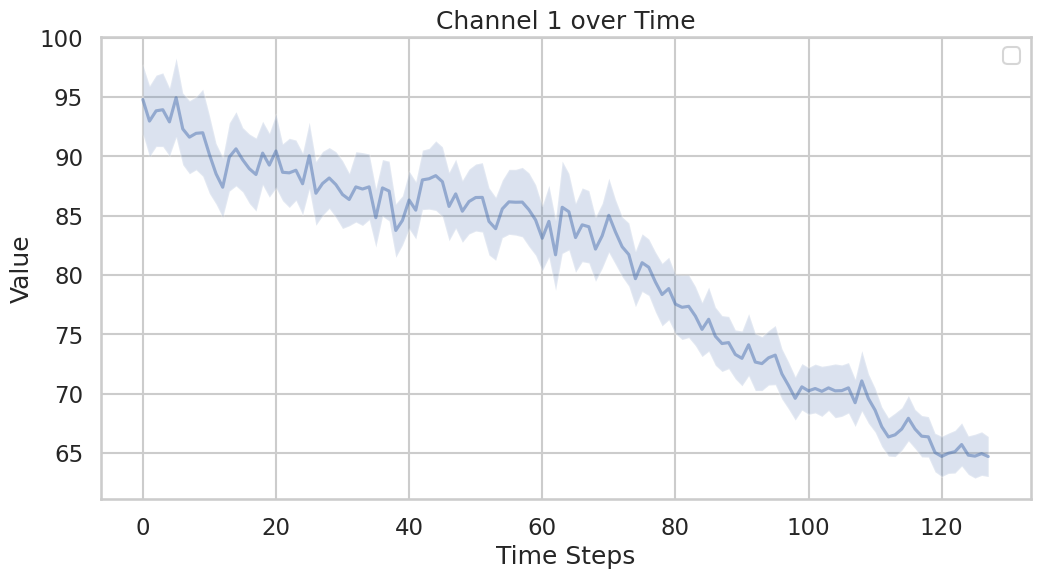

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


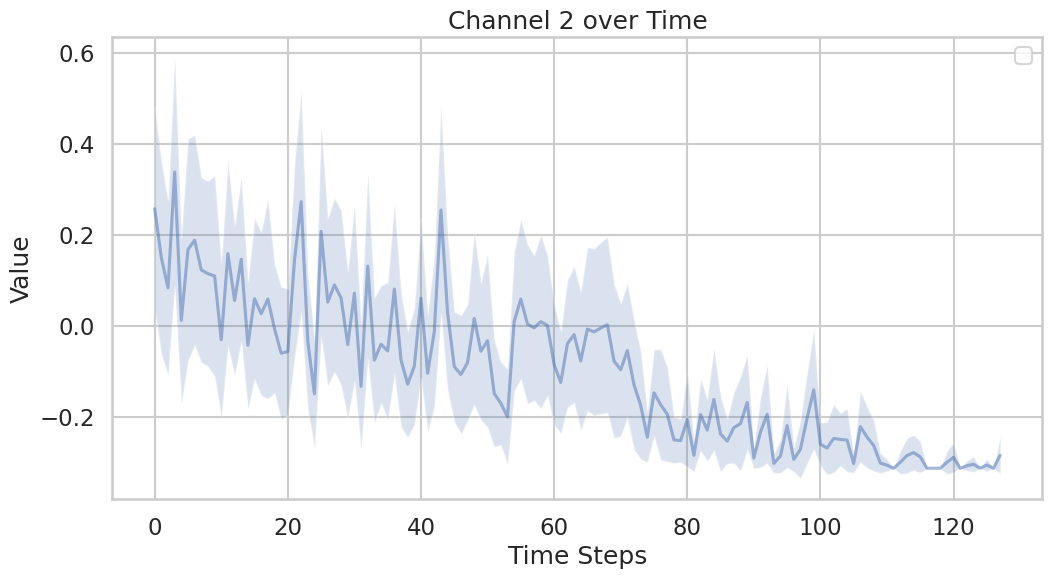

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


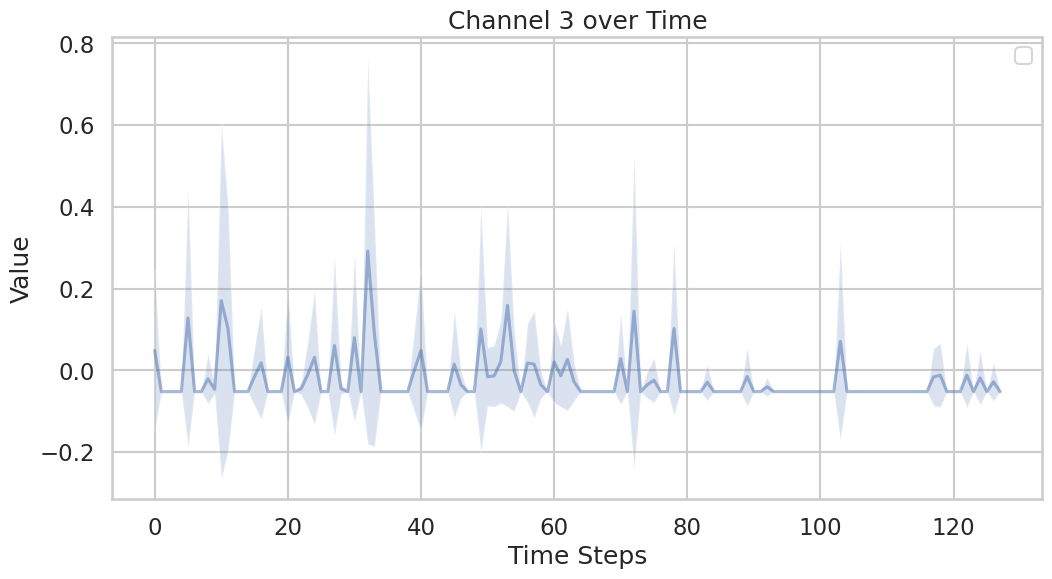

In [72]:

time_series = x_wearable_cluster_5.cpu().detach().numpy()
time_steps = time_series.shape[1]
channels = time_series.shape[2]
# Function to calculate the mean and confidence intervals

# Function to calculate the mean and confidence intervals
def calculate_mean_and_confidence_interval(data, confidence=0.95):
    mean = np.mean(data, axis=0)
    n = data.shape[0]
    stderr = np.std(data, axis=0) / np.sqrt(n)
    margin = stderr * 1.96  # 95% confidence interval for large n
    lower_bound = mean - margin
    upper_bound = mean + margin
    return mean, lower_bound, upper_bound

for channel in range(channels):
    plt.figure(figsize=(12, 6))
    feature_data = time_series[:, :, channel]
    if channel == 0:
        feature_data = feature_data * 20.41707644 + 7.93461185e+01
    mean, lower_bound, upper_bound = calculate_mean_and_confidence_interval(feature_data)
    
    # Ensure all arrays are of the same shape
    mean = mean.flatten()
    lower_bound = lower_bound.flatten()
    upper_bound = upper_bound.flatten()
    
    plt.plot(range(time_steps), mean, alpha=0.5, label=f'Feature {feature + 1}' if feature < 10 else "")
    plt.fill_between(range(time_steps), lower_bound, upper_bound, alpha=0.2)
    plt.title(f'Channel {channel + 1} over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend(loc='upper right', ncol=2, fontsize='small')
    plt.grid(True)
    plt.savefig(f'channel_{channel + 1}_over_time.pdf', format='pdf')
    plt.show()

In [15]:
import numpy as np
cluster_4_indices = np.where(cluster_labels == 4)[0]
print("Indices of data points in cluster 4:", cluster_4_indices)

Indices of data points in cluster 4: [  17   25   33   38   41   49   62   71   74   84  110  127  133  165
  181  199  209  217  223  239  253  258  304  310  314  320  326  328
  333  343  356  363  369  375  400  402  405  416  422  423  425  433
  445  447  455  469  475  484  491  506  508  514  517  526  533  536
  539  556  557  577  600  612  617  619  629  630  644  649  693  703
  704  735  739  740  751  754  760  763  771  774  780  798  801  815
  848  854  858  872  876  881  896  904  905  912  919  921  931  939
  958  978  981  989  993 1020]


In [8]:
x_wearable_cluster_4.shape

NameError: name 'x_wearable_cluster_4' is not defined

In [41]:
x_wearable_cluster_5.mean(dim=[1]).shape

torch.Size([108, 3])

In [59]:
time_series.shape

(128, 128, 3)

In [23]:
x_wearable_cluster_4 = wearable[cluster_4_indices]
temporal_out_cluster_4 = temporal_out[cluster_4_indices, 2]
time_series = x_wearable_cluster_4.cpu().detach().numpy()
time_steps = time_series.shape[1]
channels = time_series.shape[2]
# Function to calculate the mean and confidence intervals

# Function to calculate the mean and confidence intervals
def calculate_mean_and_confidence_interval(data, confidence=0.95):
    mean = np.mean(data, axis=0)
    n = data.shape[0]
    stderr = np.std(data, axis=0) / np.sqrt(n)
    margin = stderr * 1.96  # 95% confidence interval for large n
    lower_bound = mean - margin
    upper_bound = mean + margin
    return mean, lower_bound, upper_bound

for channel in range(channels):
    plt.figure(figsize=(12, 6))
    feature_data = time_series[:, :, channel]
    if channel == 0:
        feature_data = feature_data * 20.41707644 + 7.93461185e+01
    mean, lower_bound, upper_bound = calculate_mean_and_confidence_interval(feature_data)
    
    # Ensure all arrays are of the same shape
    mean = mean.flatten()
    lower_bound = lower_bound.flatten()
    upper_bound = upper_bound.flatten()
    
    plt.plot(range(time_steps), mean, alpha=0.5, label=f'Feature {feature + 1}' if feature < 10 else "")
    plt.fill_between(range(time_steps), lower_bound, upper_bound, alpha=0.2)
    plt.title(f'Channel {channel + 1} over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend(loc='upper right', ncol=2, fontsize='small')
    plt.grid(True)
    plt.savefig(f"cluster_4_channel_{channel + 1}.pdf", format="pdf")
    plt.show()

NameError: name 'feature' is not defined

<Figure size 1200x600 with 0 Axes>

NameError: name 'x_wearable' is not defined

/tmp/ipykernel_3280299/75722533.py:29: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=[data1, data2, data3], ax=axes[0], palette=box_palette)
/tmp/ipykernel_3280299/75722533.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['Tensor 1', 'Tensor 2'])


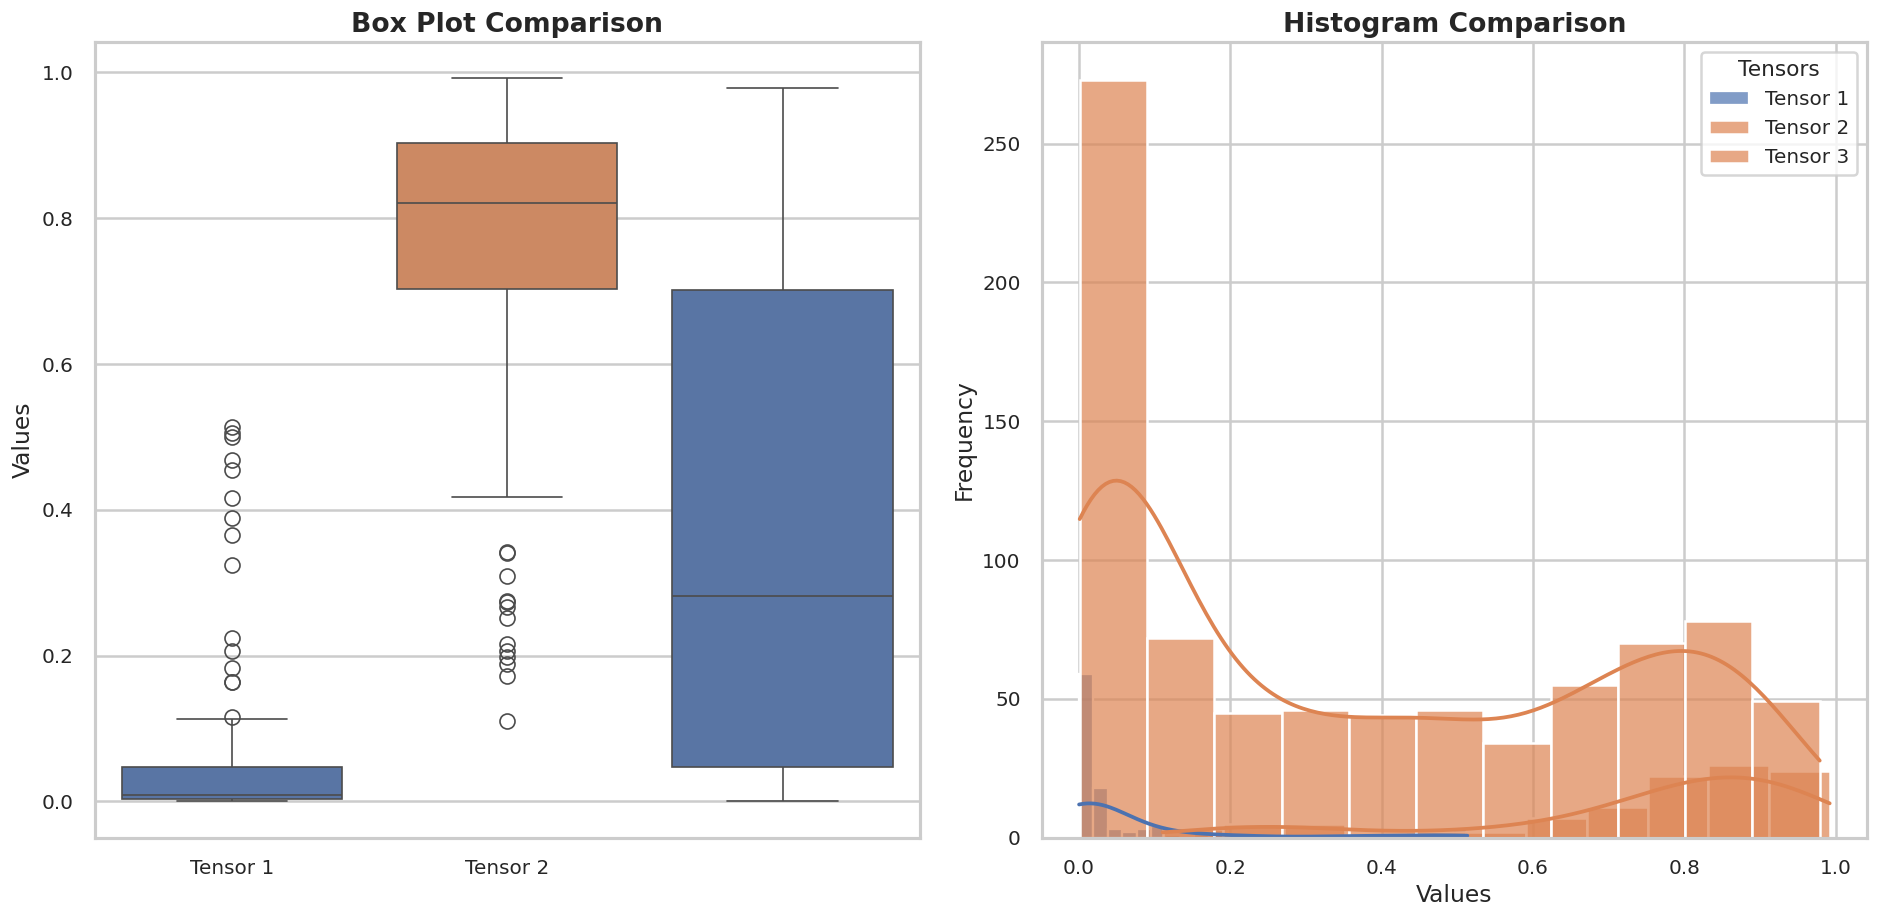

NameError: name 'mean1' is not defined

In [24]:
from scipy import stats

# # Statistical analysis
# data1 = (x_wearable_cluster_4 * 20.84327263  + 6.53019535e+00).sum(dim=[1])[:,1].cpu().detach().numpy()
# data2 = (x_wearable_cluster_5 * 20.84327263  + 6.53019535e+00).sum(dim=[1])[:,1].cpu().detach().numpy()


data1 = temporal_out_cluster_4.cpu().detach().numpy()
data2 = temporal_out_cluster_5.cpu().detach().numpy()
data3 = temporal_out_cluster_rest.cpu().detach().numpy()

# # Statistical analysis

# mean1 = np.mean(data1)
# mean2 = np.mean(data2)
# t_stat, p_value = stats.ttest_ind(data1, data2)

# Set the style and context for the plots
sns.set(style="whitegrid", context="talk")

# Define a refined color palette
box_palette = ["#4c72b0", "#dd8452"]
hist_palette = ["#4c72b0", "#dd8452"]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=120)

# Box plot
sns.boxplot(data=[data1, data2, data3], ax=axes[0], palette=box_palette)
axes[0].set_title('Box Plot Comparison', fontsize=16, weight='bold')
axes[0].set_xticklabels(['Tensor 1', 'Tensor 2'])
axes[0].set_ylabel('Values', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Histogram
sns.histplot(data1, kde=True, color=hist_palette[0], ax=axes[1], label='Tensor 1', alpha=0.7)
sns.histplot(data2, kde=True, color=hist_palette[1], ax=axes[1], label='Tensor 2', alpha=0.7)
sns.histplot(data3, kde=True, color=hist_palette[1], ax=axes[1], label='Tensor 3', alpha=0.7)
axes[1].set_title('Histogram Comparison', fontsize=16, weight='bold')
axes[1].set_xlabel('Values', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].legend(fontsize=12, title='Tensors', title_fontsize='13')
plt.savefig("tsne_plot.pdf", format="pdf")
# Display the plots
plt.tight_layout()
plt.show()

# Print statistical analysis
print(f"Mean of Tensor 1: {mean1:.2f}")
print(f"Mean of Tensor 2: {mean2:.2f}")
print(f"T-statistic: {t_stat:.9f}")
print(f"P-value: {p_value}")
# Save the figure as a PDF


In [50]:
# save data 1 and data 2 tp csv
import pandas as pd
data1 = pd.DataFrame(data1)
data2 = pd.DataFrame(data2)
data1.to_csv('data1.csv')
data2.to_csv('data2.csv')

In [23]:
covariates

tensor([[ 26.0000,  11.0000,  64.0000,   6.1000, 135.0000],
        [ 41.0000,  12.0000,  67.0000,   7.6000, 206.0000],
        [ 30.0000,  21.0000,  69.0000,   6.3000, 135.0000],
        ...,
        [ 24.0000,  19.0000,  73.0000,   6.4000, 208.0000],
        [ 30.0000,   4.0000,  68.0000,   6.1000, 177.0000],
        [ 20.0000,   4.0000,  63.0000,   6.4000, 103.0000]], device='cuda:0')

In [29]:
import numpy as np
import pandas as pd

# Convert tensors to numpy arrays
temporal_out_np = temporal_out.detach().cpu().numpy()
covariates_np = covariates.detach().cpu().numpy()

# Calculate correlation matrix between the usage of experts and covariates
correlation_matrix = np.corrcoef(temporal_out_np.T, covariates_np.T)[:temporal_out_np.shape[1], temporal_out_np.shape[1]:]

# Convert correlation matrix to a pandas DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_matrix, 
                              index=[f'Expert {i}' for i in range(temporal_out_np.shape[1])], 
                              columns=[f'Covariate {i}' for i in range(covariates_np.shape[1])])


correlation_df

,Covariate 0,Covariate 1,Covariate 2,Covariate 3,Covariate 4
Expert 0,-0.024626,-0.084378,-0.003018,-0.191285,-0.014854
Expert 1,0.002675,-0.050606,0.016826,-0.086707,0.077268
Expert 2,-0.010024,0.048524,-0.012696,0.184745,-0.041351
Expert 3,0.083250,0.131762,0.001034,-0.142495,-0.069884


In [22]:
from itertools import combinations

# Generate interaction terms (products of pairs of covariates)
interaction_terms = []
interaction_term_names = []

for combo in combinations(range(covariates_np.shape[1]), 2):
    interaction_terms.append(covariates_np[:, combo[0]] * covariates_np[:, combo[1]])
    interaction_term_names.append(f'Covariate {combo[0]} * Covariate {combo[1]}')

# Convert interaction terms to a numpy array
interaction_terms_np = np.stack(interaction_terms, axis=1)

# Calculate correlation matrix between the usage of experts and interaction terms
correlation_matrix_interactions = np.corrcoef(temporal_out_np.T, interaction_terms_np.T)[:temporal_out_np.shape[1], temporal_out_np.shape[1]:]

# Convert correlation matrix to a pandas DataFrame for better visualization
correlation_df_interactions = pd.DataFrame(correlation_matrix_interactions, 
                                           index=[f'Expert {i}' for i in range(temporal_out_np.shape[1])], 
                                           columns=interaction_term_names)


correlation_df_interactions

,Covariate 0 * Covariate 1,Covariate 0 * Covariate 2,Covariate 0 * Covariate 3,Covariate 0 * Covariate 4,Covariate 1 * Covariate 2,Covariate 1 * Covariate 3,Covariate 1 * Covariate 4,Covariate 2 * Covariate 3,Covariate 2 * Covariate 4,Covariate 3 * Covariate 4
Expert 0,-0.091086,-0.027692,-0.066168,-0.023924,-0.086935,-0.103598,-0.084162,-0.170264,-0.014016,-0.112368
Expert 1,-0.047378,0.002304,-0.012050,0.030241,-0.054744,-0.054273,-0.040860,-0.069300,0.063744,0.015460
Expert 2,0.052404,-0.008157,0.028384,-0.026029,0.052418,0.066797,0.042466,0.157841,-0.034313,0.064178
Expert 3,0.115339,0.082144,0.044873,0.052312,0.134428,0.100110,0.122692,-0.126127,-0.053328,-0.128729


In [24]:
temporal_out_np.shape

(1024, 4)

In [35]:
temporal_out_np[:, 0]

array([0.14511167, 0.12551886, 0.03465109, ..., 0.1399081 , 0.47100168,
       0.2986438 ], dtype=float32)

In [32]:
covariates_np

array([[ 26. ,  11. ,  64. ,   6.1, 135. ],
       [ 41. ,  12. ,  67. ,   7.6, 206. ],
       [ 30. ,  21. ,  69. ,   6.3, 135. ],
       ...,
       [ 24. ,  19. ,  73. ,   6.4, 208. ],
       [ 30. ,   4. ,  68. ,   6.1, 177. ],
       [ 20. ,   4. ,  63. ,   6.4, 103. ]], dtype=float32)

In [26]:
covariates_np.shape

(1024, 5)

In [30]:
from sklearn.metrics import mutual_info_score



def compute_mutual_info(matrix1, matrix2):
    mi_matrix = np.zeros((matrix1.shape[1], matrix2.shape[1]))
    for i in range(matrix1.shape[1]):
        for j in range(matrix2.shape[1]):
            mi_matrix[i, j] = mutual_info_score(matrix1[:, i], matrix2[:, j])
    return mi_matrix

mi_matrix = compute_mutual_info(temporal_out_np, covariates_np)
print("Mutual Information Matrix:\n", mi_matrix)

Mutual Information Matrix:
 [[3.5344116  3.47184213 2.59574812 3.19709621 4.02890734]
 [3.5344116  3.47184213 2.59574812 3.19709621 4.02890734]
 [3.5344116  3.47184213 2.59574812 3.19709621 4.02890734]
 [3.5344116  3.47184213 2.59574812 3.19709621 4.02890734]]


/home/yl2428/.conda/envs/Time-LLM/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/yl2428/.conda/envs/Time-LLM/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/yl2428/.conda/envs/Time-LLM/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/yl2428/.conda/envs/Time-LLM/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous value

In [36]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=2)
cca.fit(temporal_out_np, covariates_np)
X_c, Y_c = cca.transform(temporal_out_np, covariates_np)

print("Canonical Correlation:\n", cca.score(temporal_out_np, covariates_np))

Canonical Correlation:
 0.006082933497934473


In [38]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
# from sklearn.inspection import plot_partial_dependence

# Concatenate matrices for training
X = temporal_out_np

# Target variable (for demonstration purposes, you might have your own target)
y = covariates_np

# Fit Random Forest
rf = RandomForestRegressor()
rf.fit(X, y)

# Feature importances
feature_importances = rf.feature_importances_
print("Feature Importances:\n", feature_importances)

# # Partial dependence plots
# plot_partial_dependence(rf, X, range(X.shape[1]), grid_resolution=50)
# plt.show()

Feature Importances:
 [0.28886998 0.21271797 0.21023527 0.28817677]
